<a href="https://colab.research.google.com/github/lianeraji/Amal/blob/main/amal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from qiskit import QuantumCircuit

def qcare_vqc(x, theta, measure=False):
    """
    x: length 8   (soft features -> angles)
    theta: length 8 (trainable params -> learned dynamics)
    measure: if True add measurements
    """
    assert len(x) == 8
    assert len(theta) == 8

    qc = QuantumCircuit(4)

    # ---------- Encoding layer ----------
    qc.ry(x[0], 0); qc.rz(x[1], 0)   # Calm
    qc.ry(x[2], 1); qc.rz(x[3], 1)   # Anxiety
    qc.ry(x[4], 2); qc.rz(x[5], 2)   # Hyperarousal
    qc.ry(x[6], 3); qc.rz(x[7], 3)   # Avoidance

    # ---------- Entanglement: ring + cross ----------
    qc.cx(0, 1)
    qc.cx(1, 2)
    qc.cx(2, 3)
    qc.cx(3, 0)
    qc.cx(0, 2)
    qc.cx(1, 3)

    # ---------- Trainable layer ----------
    qc.ry(theta[0], 0); qc.rz(theta[1], 0)
    qc.ry(theta[2], 1); qc.rz(theta[3], 1)
    qc.ry(theta[4], 2); qc.rz(theta[5], 2)
    qc.ry(theta[6], 3); qc.rz(theta[7], 3)

    # ---------- Data re-uploading ----------
    qc.ry(x[0]/2, 0); qc.rz(x[1]/2, 0)
    qc.ry(x[2]/2, 1); qc.rz(x[3]/2, 1)
    qc.ry(x[4]/2, 2); qc.rz(x[5]/2, 2)
    qc.ry(x[6]/2, 3); qc.rz(x[7]/2, 3)

    # ---------- Entanglement again ----------
    qc.cz(0, 1)
    qc.cz(1, 2)
    qc.cz(2, 3)
    qc.cz(3, 0)

    if measure:
        qc.measure_all()

    return qc


In [ ]:
# Example features (angles in radians)
x = [0.7, 0.2,  1.0, 0.3,  0.9, 0.4,  0.8, 0.25]

# Example trainable params (small angles)
theta = [0.15, 0.05, 0.2, 0.1, 0.18, 0.08, 0.12, 0.06]

qc = qcare_vqc(x, theta, measure=False)
print(qc.draw(output="text"))


     ┌─────────┐┌─────────┐                ┌───┐     ┌──────────┐┌──────────┐»
q_0: ┤ Ry(0.7) ├┤ Rz(0.2) ├───■────────────┤ X ├──■──┤ Ry(0.15) ├┤ Rz(0.05) ├»
     └┬───────┬┘├─────────┤ ┌─┴─┐          └─┬─┘  │  └──────────┘├─────────┬┘»
q_1: ─┤ Ry(1) ├─┤ Rz(0.3) ├─┤ X ├──■─────────┼────┼───────■──────┤ Ry(0.2) ├─»
     ┌┴───────┴┐├─────────┤ └───┘┌─┴─┐       │  ┌─┴─┐     │      ├─────────┴┐»
q_2: ┤ Ry(0.9) ├┤ Rz(0.4) ├──────┤ X ├──■────┼──┤ X ├─────┼──────┤ Ry(0.18) ├»
     ├─────────┤├─────────┴┐     └───┘┌─┴─┐  │  └───┘   ┌─┴─┐    ├──────────┤»
q_3: ┤ Ry(0.8) ├┤ Rz(0.25) ├──────────┤ X ├──■──────────┤ X ├────┤ Ry(0.12) ├»
     └─────────┘└──────────┘          └───┘             └───┘    └──────────┘»
«     ┌──────────┐┌─────────┐                          
«q_0: ┤ Ry(0.35) ├┤ Rz(0.1) ├───────────────■────────■─
«     ├─────────┬┘├─────────┤  ┌──────────┐ │        │ 
«q_1: ┤ Rz(0.1) ├─┤ Ry(0.5) ├──┤ Rz(0.15) ├─■──■─────┼─
«     ├─────────┴┐├─────────┴┐ ├─────────┬┘    │     │ 
«q_2: ┤ R

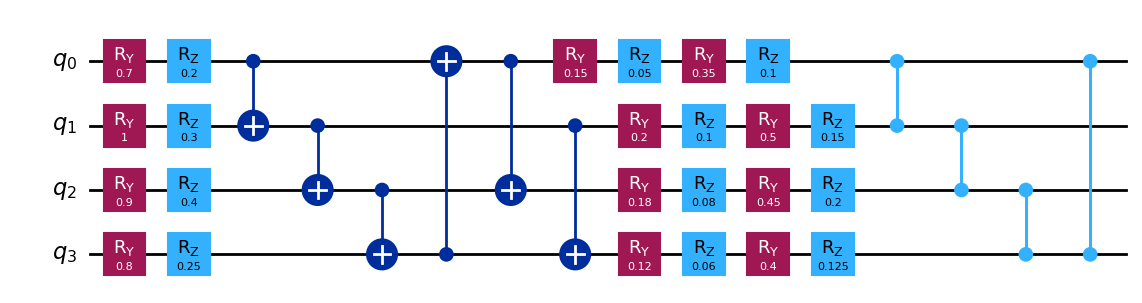

In [ ]:
!pip -q install pylatexenc
qc.draw("mpl")


In [ ]:
!pip -q install qiskit qiskit-aer
!pip -q install pylatexenc matplotlib


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 4.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [ ]:
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
from IPython.display import display
from qiskit.visualization import circuit_drawer

qc = qcare_vqc([0.1]*8, [0.2]*8)

fig = circuit_drawer(qc, output="mpl", fold=-1)
ax = fig.axes[0]

ball = Circle((0.05, 0.85), 0.04, transform=ax.transAxes,
              fill=False, linewidth=2)
ax.add_patch(ball)
ax.text(0.03, 0.88, "⚽", fontsize=24, transform=ax.transAxes)

plt.figure(fig.number)   # يخليها الشكل الحالي
plt.show()


<Figure size 640x480 with 0 Axes>